# EDA - Réseau Routier Togo Extension

Ce notebook présente une analyse exploratoire du fichier `reseau_routier_togo_ext.csv`.
L'objectif est d'analyser l'état des routes, le trafic et la connectivité entre les régions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Chargement du dataset
df_routes = pd.read_csv('../../data_raw/reseau_routier_togo_ext.csv')

# Affichage des premières lignes
df_routes.head()

,route_id,type_route,nom_route,region_origine,region_destination,prefecture_origine,prefecture_destination,longueur_km,etat_route,temps_parcours_heures,points_controle,bus_par_jour,camions_par_jour,passagers_par_jour
0,R001,Nationale,RN1,Maritime,Plateaux,Vo,Ogou,150,Bon,2.5,3,85,45,1250
1,R002,Nationale,RN2,Plateaux,Centrale,Ogou,Sotouboua,120,Moyen,2.8,2,65,35,950
2,R003,Nationale,RN3,Centrale,Kara,Sotouboua,Kozah,110,Moyen,2.6,2,60,30,850
3,R004,Nationale,RN4,Kara,Savanes,Kozah,Oti,95,Mediocre,3.0,2,45,25,650
4,R005,Nationale,RN5,Maritime,Kara,Vo,Kozah,420,Moyen,8.5,6,70,55,1600


In [3]:
# Aperçu des données
#display(df_routes.head())
print(df_routes.info())
display(df_routes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                40 non-null     object 
 1   type_route              40 non-null     object 
 2   nom_route               40 non-null     object 
 3   region_origine          40 non-null     object 
 4   region_destination      40 non-null     object 
 5   prefecture_origine      40 non-null     object 
 6   prefecture_destination  40 non-null     object 
 7   longueur_km             40 non-null     int64  
 8   etat_route              40 non-null     object 
 9   temps_parcours_heures   40 non-null     float64
 10  points_controle         40 non-null     int64  
 11  bus_par_jour            40 non-null     int64  
 12  camions_par_jour        40 non-null     int64  
 13  passagers_par_jour      40 non-null     int64  
dtypes: float64(1), int64(5), object(8)
memory us

,longueur_km,temps_parcours_heures,points_controle,bus_par_jour,camions_par_jour,passagers_par_jour
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,99.725000,2.292500,1.500000,75.275000,19.625000,1157.000000
std,86.300307,1.902547,1.467599,33.226486,13.558397,459.822708
min,18.000000,0.400000,0.000000,35.000000,3.000000,550.000000
25%,45.000000,1.075000,0.000000,55.000000,9.000000,850.000000
50%,70.000000,1.650000,1.000000,66.500000,15.500000,1025.000000
75%,121.250000,2.800000,2.000000,90.000000,25.000000,1412.500000
max,420.000000,8.500000,6.000000,180.000000,55.000000,2500.000000


## Vérification de la qualité des données

In [4]:
# Vérification des valeurs manquantes
missing_values = df_routes.isnull().sum()
print("Valeurs manquantes :\n", missing_values[missing_values > 0])

# Vérification des doublons
duplicates = df_routes.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")

Valeurs manquantes :
 Series([], dtype: int64)

Nombre de doublons : 0


## Feature Engineering (Calculs préliminaires)

In [5]:
# Calcul de la vitesse moyenne estimée (km/h)
df_routes['vitesse_moyenne'] = df_routes['longueur_km'] / df_routes['temps_parcours_heures']
display(df_routes[['route_id', 'longueur_km', 'temps_parcours_heures', 'vitesse_moyenne']].head())

,route_id,longueur_km,temps_parcours_heures,vitesse_moyenne
0,R001,150,2.5,60.000000
1,R002,120,2.8,42.857143
2,R003,110,2.6,42.307692
3,R004,95,3.0,31.666667
4,R005,420,8.5,49.411765


## Analyse Univariée

C:\Users\RIG\AppData\Local\Temp\ipykernel_3028\2156843090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type_route', data=df_routes, palette='viridis')


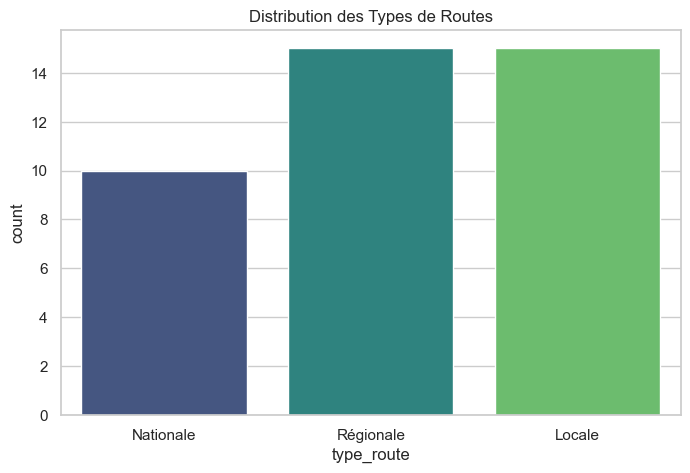

In [6]:
# Distribution des Types de Routes
plt.figure(figsize=(8, 5))
sns.countplot(x='type_route', data=df_routes, palette='viridis')
plt.title("Distribution des Types de Routes")
plt.show()

C:\Users\RIG\AppData\Local\Temp\ipykernel_3028\767527270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='etat_route', data=df_routes, order=['Bon', 'Moyen', 'Mediocre'], palette='coolwarm')


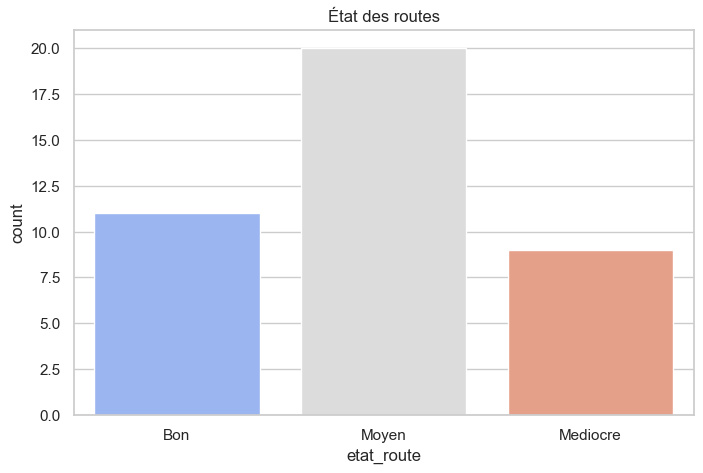

In [7]:
# L'état des routes
plt.figure(figsize=(8, 5))
sns.countplot(x='etat_route', data=df_routes, order=['Bon', 'Moyen', 'Mediocre'], palette='coolwarm')
plt.title("État des routes")
plt.show()

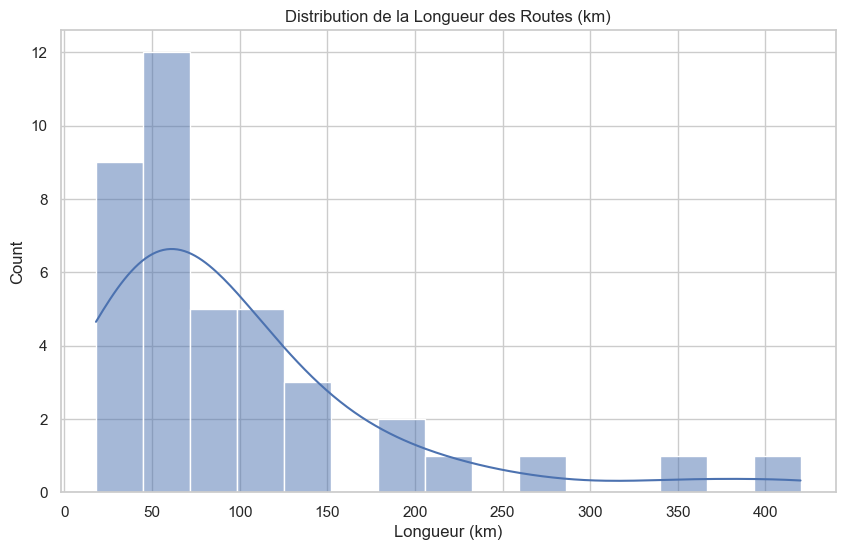

In [8]:
# Distribution de la longueur des routes
plt.figure(figsize=(10, 6))
sns.histplot(df_routes['longueur_km'], kde=True, bins=15)
plt.title("Distribution de la Longueur des Routes (km)")
plt.xlabel("Longueur (km)")
plt.show()

## Analyse Bivariée

region_destination
Savanes     11
Kara         9
Plateaux     8
Centrale     6
Maritime     6
Name: count, dtype: int64


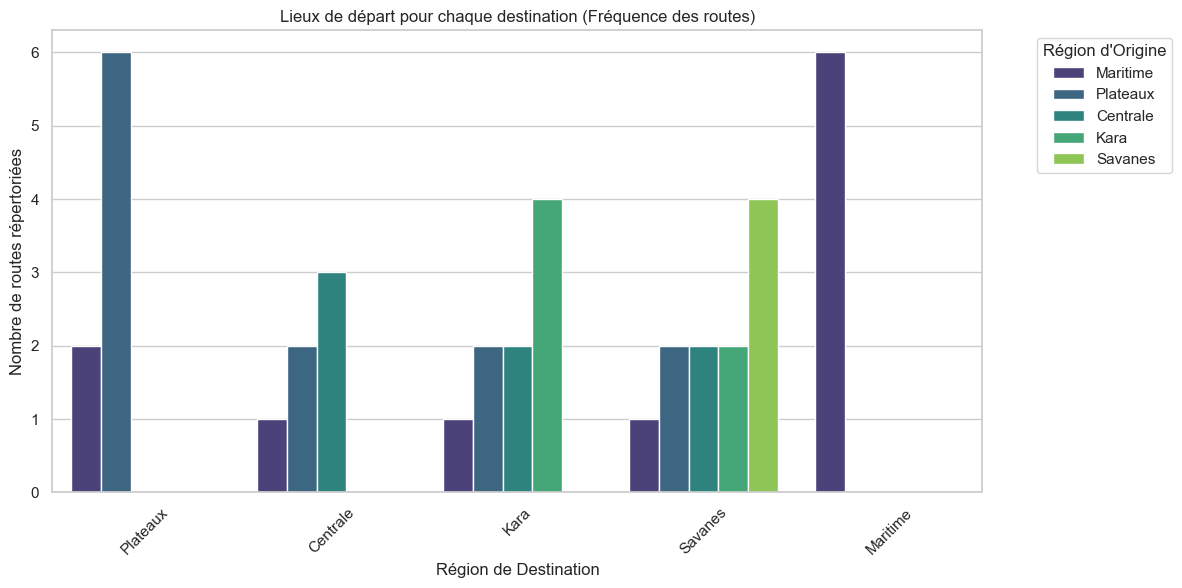

In [ ]:
#nombre de passagers a chaque destination
# Top 5 des destinations les plus fréquentes
top_destinations = df_routes['region_destination'].value_counts().head(5)
print(top_destinations)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# On affiche les destinations sur l'axe X, et on colore par région d'origine
sns.countplot(data=df_routes, 
              x='region_destination', 
              hue='region_origine', 
              palette='viridis')

plt.title('Lieux de départ pour chaque destination (Fréquence des routes)')
plt.xlabel('Région de Destination')
plt.ylabel('Nombre de routes répertoriées')
plt.legend(title='Région d\'Origine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

#nombre de passagers a chaque destination


C:\Users\RIG\AppData\Local\Temp\ipykernel_3028\3420263898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='etat_route', y='vitesse_moyenne', data=df_routes, order=['Bon', 'Moyen', 'Mediocre'], palette='coolwarm')


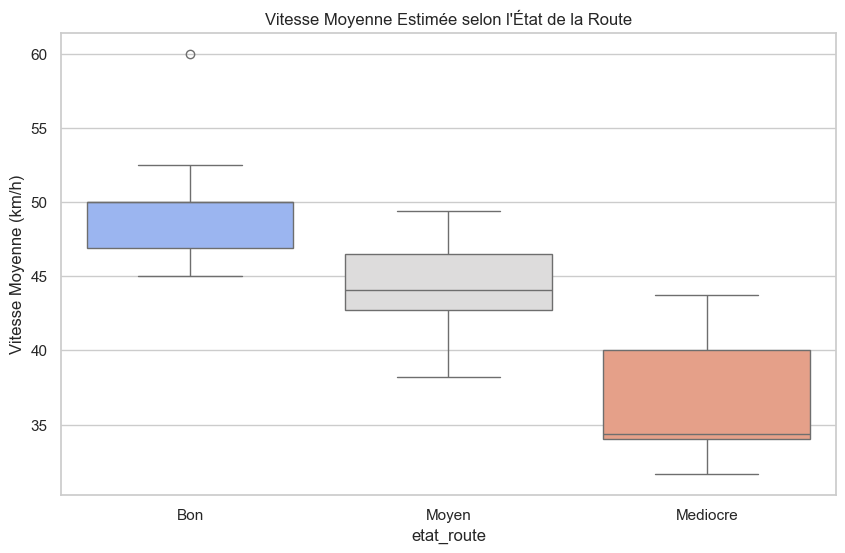

In [9]:
# Vitesse moyenne par état de route
plt.figure(figsize=(10, 6))
sns.boxplot(x='etat_route', y='vitesse_moyenne', data=df_routes, order=['Bon', 'Moyen', 'Mediocre'], palette='coolwarm')
plt.title("Vitesse Moyenne Estimée selon l'État de la Route")
plt.ylabel("Vitesse Moyenne (km/h)")
plt.show()

C:\Users\RIG\AppData\Local\Temp\ipykernel_3028\2775435769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type_route', y='passagers_par_jour', data=df_routes, estimator=np.sum, palette='viridis')


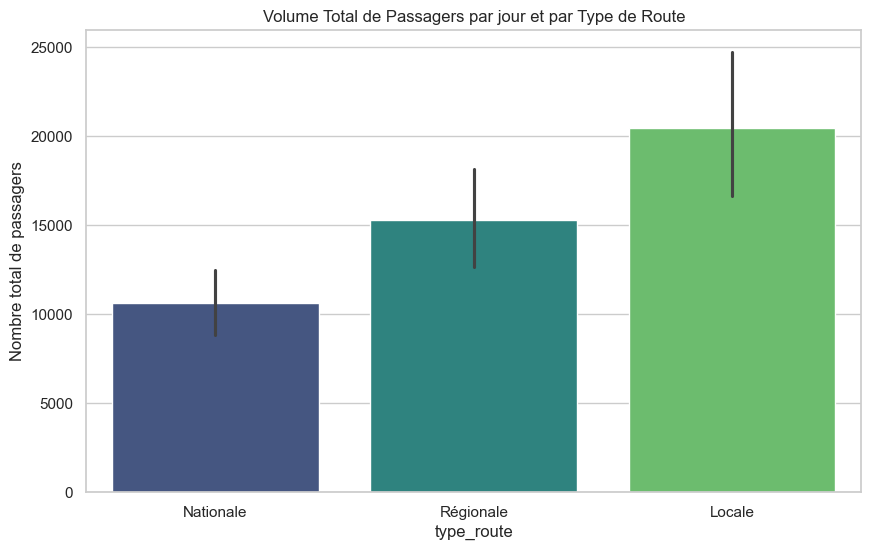

In [10]:
# Volume de passagers par Type de Route
plt.figure(figsize=(10, 6))
sns.barplot(x='type_route', y='passagers_par_jour', data=df_routes, estimator=np.sum, palette='viridis')
plt.title("Volume Total de Passagers par jour et par Type de Route")
plt.ylabel("Nombre total de passagers")
plt.show()

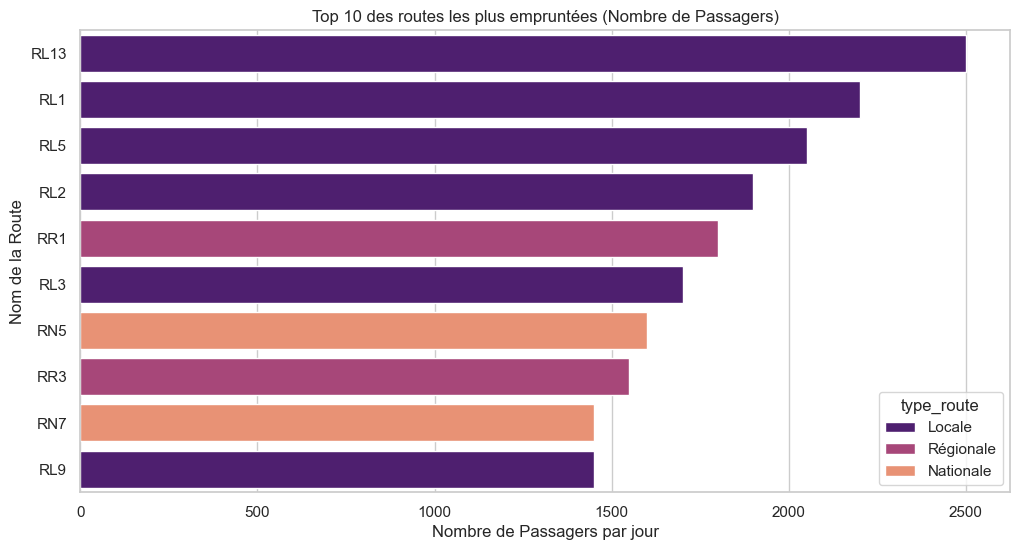

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trier les 10 routes les plus fréquentées
top_10_routes = df_routes.nlargest(10, 'passagers_par_jour')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_routes, 
            y='nom_route', 
            x='passagers_par_jour', 
            hue='type_route', 
            palette='magma')

plt.title('Top 10 des routes les plus empruntées (Nombre de Passagers)')
plt.xlabel('Nombre de Passagers par jour')
plt.ylabel('Nom de la Route')
plt.show()

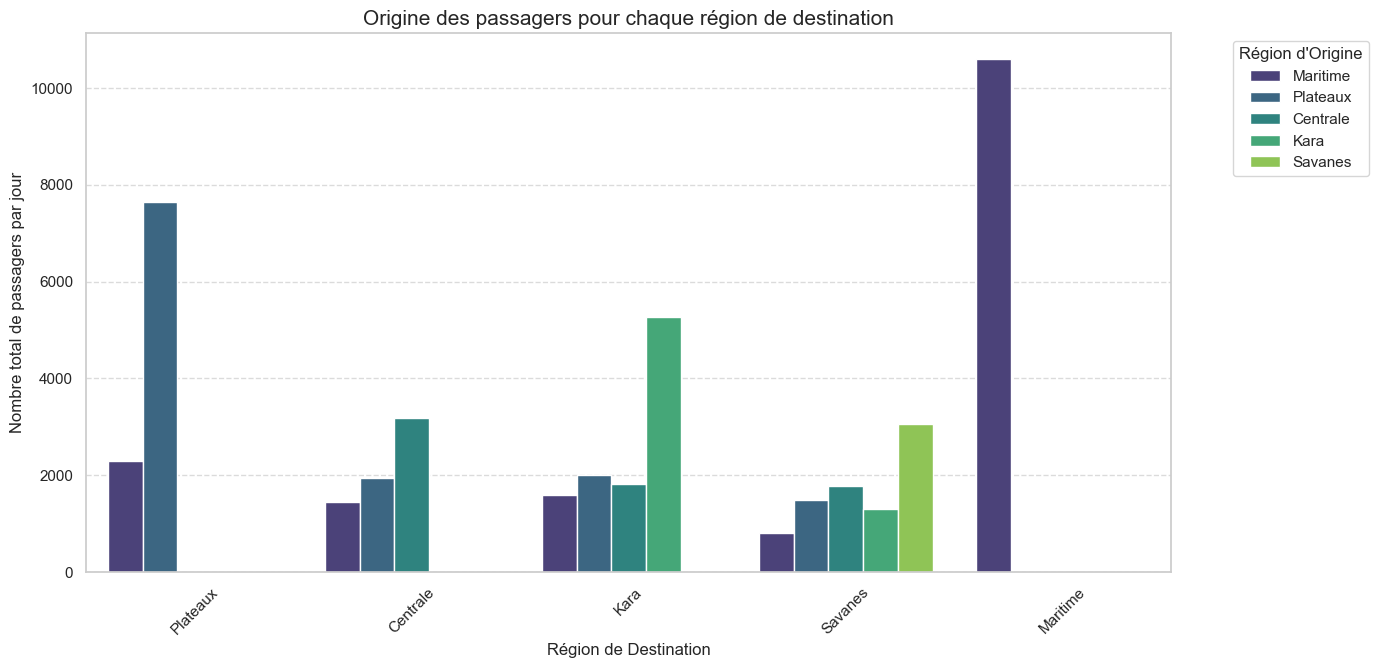

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# On affiche les destinations sur l'axe X, et l'origine en couleur (hue)
# On utilise la somme des passagers pour montrer l'importance réelle
sns.barplot(data=df_routes, 
            x='region_destination', 
            y='passagers_par_jour', 
            hue='region_origine', 
            estimator=sum, 
            errorbar=None,
            palette='viridis')

plt.title('Origine des passagers pour chaque région de destination', fontsize=15)
plt.xlabel('Région de Destination', fontsize=12)
plt.ylabel('Nombre total de passagers par jour', fontsize=12)
plt.legend(title='Région d\'Origine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

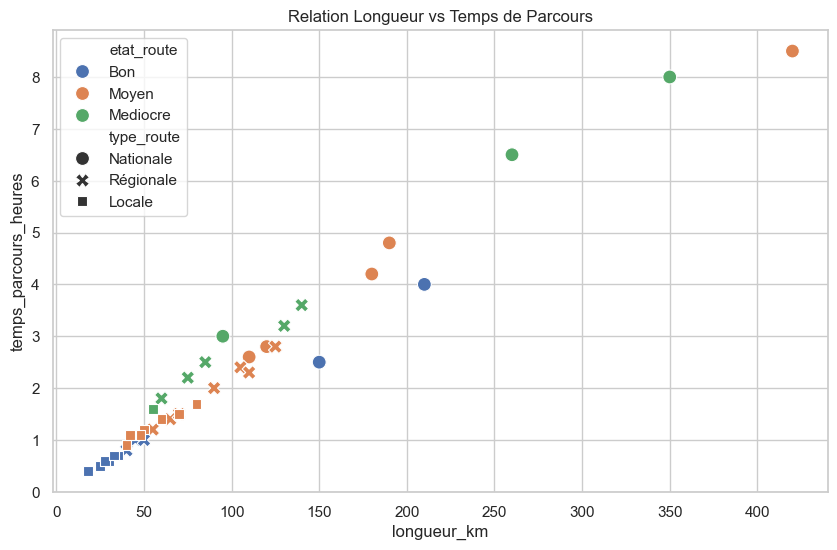

In [11]:
# Relation entre longueur et temps de parcours (coloré par état)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longueur_km', y='temps_parcours_heures', hue='etat_route', data=df_routes, style='type_route', s=100)
plt.title("Relation Longueur vs Temps de Parcours")
plt.show()

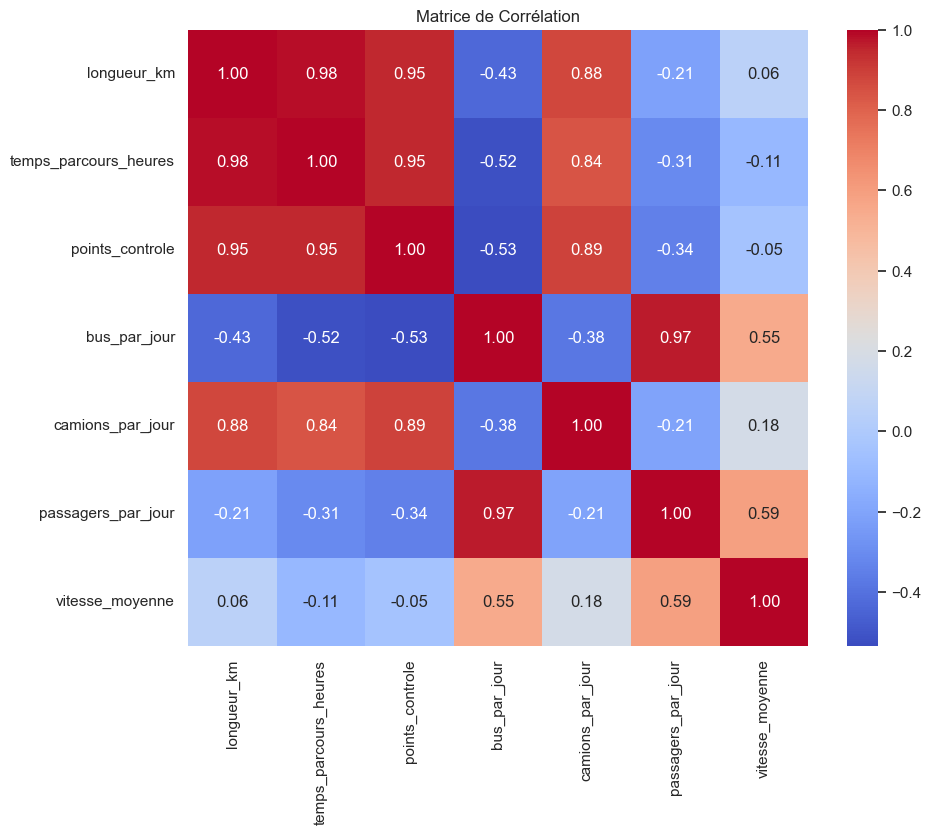

In [12]:
# Matrice de corrélation
numeric_cols = df_routes.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_routes[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation")
plt.show()

In [17]:
#cette donnée est deja propre donc on va la sauvegarder
import os 
import sys  
# 1. Ajout du chemin au système
module_path = r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees"
if module_path not in sys.path:
    sys.path.append(module_path)
df_routes.to_csv(r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees\data_cleaned\reseau_routier_togo_ext_cleaned.csv", index=False)